In [1]:
#%config Completer.use_jedi = False

In [53]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import collections as cl
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,accuracy_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [3]:
data = pd.read_csv('D:\maestria_ciencias_economicas_unal\machine_learning_python\quizes\weatherAUS.csv')
data = data.dropna(how='any',axis=0)

In [44]:
data['RainTomorrow'].value_counts()


No     43993
Yes    12427
Name: RainTomorrow, dtype: int64

In [81]:
y_encoder = LabelEncoder()
y_encoded = y_encoder.fit(data['RainTomorrow'])
y_encoded = y_encoder.fit_transform(data['RainTomorrow'])
y_encoded

array([0, 0, 0, ..., 0, 0, 0])

In [84]:
#1
y = np.array(y_encoded)


x1 = np.array(data['MaxTemp'])
x2 = np.array(data['WindSpeed9am'])
x3 = np.array(data['Pressure9am'])
x4 = np.array(data['Evaporation'])

X = np.array([x1,x2,x3,x4]).T

#2
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=14)

In [83]:
print(cl.Counter(y))

Counter({'No': 43993, 'Yes': 12427})


***
___

# Regresión logística

estime un modelo de regresión logísitca sin incluir hiperparámetros, utilice el conjunto de entrenamiento para entrenar el modelo y el conjunto de prueba para hacer las predicciónes y obtener los scores

In [85]:
#3
reg_log = LogisticRegression().fit(X_train,y_train)


In [86]:
#4
reg_log_predict_= reg_log.predict(X_test)
reg_log_predict_proba_ = reg_log.predict_proba(X_test)
reg_log_predict_

array([0, 0, 0, ..., 0, 0, 0])

In [87]:
#5
reg_log_train_score = reg_log.score(X_train,y_train)
reg_log_test_score = reg_log.score(X_test,y_test)

reg_log_r2_score = r2_score(y_test,reg_log_predict_)
reg_log_accuracy = accuracy_score(y_test,reg_log_predict_)


print("Train score: ", reg_log_train_score)
print("Test score: ", reg_log_test_score)
print("r2_score: ",reg_log_r2_score, "OJO en este modelo la interpretación del r2 es ambiüa")
print("accuracy_score: ",reg_log_accuracy)

Train score:  0.7801016188112962
Test score:  0.7792272243885147
r2_score:  -0.28420972673970146 OJO en este modelo la interpretación del r2 es ambiüa
accuracy_score:  0.7792272243885147


# SVC

estime un modelo de SVC, solamente cambie el tipo de kernel, mencione con cuál obtiene un mayor accracy_score. entrene el modelo con el conjunto de entrenamiento y calcule los scores con el conjunto de prueba

In [91]:
kernels = ['rbf','poly','sigmoid','linear'] #lineal
svc_lineal = SVC(kernel='linear').fit(X_train,y_train)
svc_predict_ = svc_lineal.predict(X_test)

print("train score: ", svc_lineal.score(X_train,y_train),"\n",
 "test score: ", svc_lineal.score(X_test,y_test),"\n",
 "accuracy: ", accuracy_score(y_test,svc_predict_))

train score:  0.7921540824766631 
 test score:  0.7915632754342432 
 accuracy:  0.7915632754342432


In [106]:
kernels = ['rbf','poly','sigmoid','linear']
svc_lineal = SVC(kernel='sigmoid').fit(X_train,y_train)
svc_predict_ = svc_lineal.predict(X_test)

print("train score: ", svc_lineal.score(X_train,y_train),"\n",
 "test score: ", svc_lineal.score(X_test,y_test),"\n",
 "accuracy: ", accuracy_score(y_test,svc_predict_))

train score:  0.7798416637126314 
 test score:  0.7794399149237858 
 accuracy:  0.7794399149237858


In [107]:
kernels = ['rbf','poly','sigmoid','linear']
svc_poly = SVC(kernel='poly').fit(X_train,y_train)
svc_predict_ = svc_poly.predict(X_test)

print("train score: ", svc_poly.score(X_train,y_train),"\n",
 "test score: ", svc_poly.score(X_test,y_test),"\n",
 "accuracy: ", accuracy_score(y_test,svc_predict_))

train score:  0.7798416637126314 
 test score:  0.7794399149237858 
 accuracy:  0.7794399149237858


In [108]:
kernels = ['rbf','poly','sigmoid','linear']
svc_rbf = SVC(kernel='rbf').fit(X_train,y_train)
svc_predict_ = svc_rbf.predict(X_test)

print("train score: ", svc_rbf.score(X_train,y_train),"\n",
 "test score: ", svc_rbf.score(X_test,y_test),"\n",
 "accuracy: ", accuracy_score(y_test,svc_predict_))

train score:  0.7798416637126314 
 test score:  0.7794399149237858 
 accuracy:  0.7794399149237858


# Decission Tree
Estime un árbol de decisió, use como criterio el coeficiente de gini y como profundiad máxima [3,5,10,20], entrene el modelo con el conjunto de entrenamiento y calcule los scores con el conjunto de prueba

In [97]:
max_depths = [3,5,10,20] #max_Depht = 5
tree = DecisionTreeClassifier(max_depth=3,criterion='gini').fit(X_train,y_train)
tree_predict = tree.predict(X_test)
print("""
Train score: {}
Test score:  {}
accuracy:  {}
""".format(tree.score(X_train,y_train),tree.score(X_test,y_test),accuracy_score(y_test,tree_predict)))


Train score: 0.7877112135176652
Test score:  0.7858915278270117
accuracy:  0.7858915278270117



In [98]:
tree = DecisionTreeClassifier(max_depth= 5,criterion='gini').fit(X_train,y_train)
tree_predict = tree.predict(X_test)
print("""
Train score: {}
Test score:  {}
accuracy:  {}
""".format(tree.score(X_train,y_train),tree.score(X_test,y_test),accuracy_score(y_test,tree_predict)))


Train score: 0.7956280278860924
Test score:  0.7948954271534917
accuracy:  0.7948954271534917



In [101]:
tree = DecisionTreeClassifier(max_depth=10,criterion='gini').fit(X_train,y_train)
tree_predict = tree.predict(X_test)
print("""
Train score: {}
Test score:  {}
accuracy:  {}
""".format(tree.score(X_train,y_train),tree.score(X_test,y_test),accuracy_score(y_test,tree_predict)))


Train score: 0.8162117452440033
Test score:  0.7871676710386388
accuracy:  0.7871676710386388



In [102]:
def trees_(X,y,max_depth,criterion):
    # 2.
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.25, random_state=14)
    # 3.
    tree = DecisionTreeClassifier(max_depth=max_depth,criterion=criterion).fit(X_train,y_train)
    # 4.
    tree_predict = tree.predict(X_test)
    # 5.
    print("""
    Train score: {}
    Test score:  {}
    accuracy:  {}
    
    """.format(tree.score(X_train,y_train),tree.score(X_test,y_test),accuracy_score(y_test,tree_predict)))
    
    fig = plt.figure(figsize=(25,20))
    plot_tree(tree, filled=True)
    plt.show()
    return tree


    Train score: 0.7956280278860924
    Test score:  0.7948954271534917
    accuracy:  0.7948954271534917
    
    


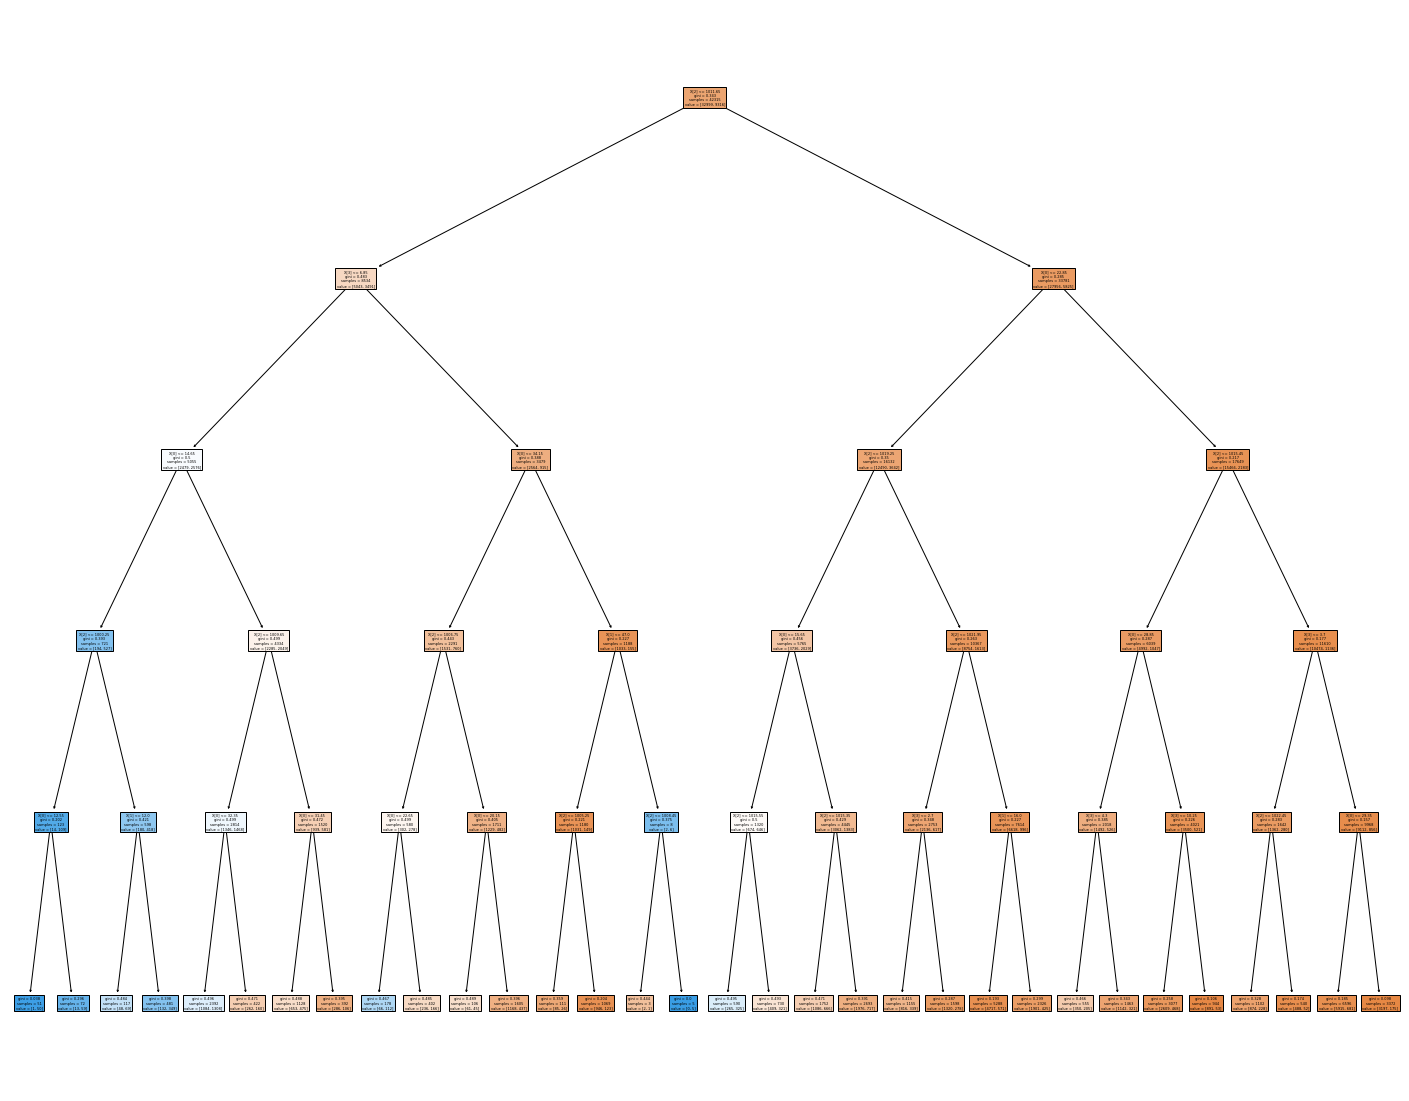

DecisionTreeClassifier(max_depth=5)

In [105]:
trees_(X=X,y=y,max_depth=5,criterion='gini')

***
___

### Escale las variables y estime los modelos con los hiperparámetros que generan el mayor accuracy_score 

entrene cada modelo con el conjunto de entrenamiento y calcule los scores con el conjunto de prueba

In [109]:
## Escalamos la variable predictora

minmax = MinMaxScaler()
X_norm = minmax.fit_transform(X)


#2. conjunto de entrenamiento y prueba con X_norm
X_train,X_test,y_train,y_test = train_test_split(X_norm,y, test_size=0.25,random_state=14)

In [110]:
#RL
#3
reg_log = LogisticRegression().fit(X_train,y_train)
#4
reg_log_predict_= reg_log.predict(X_test)
reg_log_predict_proba_ = reg_log.predict_proba(X_test)
reg_log_train_score = reg_log.score(X_train,y_train)
reg_log_test_score = reg_log.score(X_test,y_test)

reg_log_r2_score = r2_score(y_test,reg_log_predict_)
reg_log_accuracy = accuracy_score(y_test,reg_log_predict_)


print("Train score: ", reg_log_train_score)
print("Test score: ", reg_log_test_score)
print("r2_score: ",reg_log_r2_score, "OJO en este modelo la interpretación del r2 es ambiüa")
print("accuracy_score: ",reg_log_accuracy)

Train score:  0.7922958761668439
Test score:  0.7922722438851472
r2_score:  -0.2083283556028661 OJO en este modelo la interpretación del r2 es ambiüa
accuracy_score:  0.7922722438851472


In [111]:
#SVM
#lineal
svc_lineal = SVC(kernel='linear').fit(X_train,y_train)
svc_predict_ = svc_lineal.predict(X_test)

print("train score: ", svc_lineal.score(X_train,y_train),"\n",
 "test score: ", svc_lineal.score(X_test,y_test),"\n",
 "accuracy: ", accuracy_score(y_test,svc_predict_))

train score:  0.7798416637126314 
 test score:  0.7794399149237858 
 accuracy:  0.7794399149237858


In [112]:
#TREE #mejor modelo
tree = DecisionTreeClassifier(max_depth= 5,criterion='gini').fit(X_train,y_train)
tree_predict = tree.predict(X_test)
print("""
Train score: {}
Test score:  {}
accuracy:  {}
""".format(tree.score(X_train,y_train),tree.score(X_test,y_test),accuracy_score(y_test,tree_predict)))


Train score: 0.7956280278860924
Test score:  0.7948954271534917
accuracy:  0.7948954271534917

